<a href="https://colab.research.google.com/github/bmnds/uea-data-science-03-statistics/blob/main/%5BEstat%C3%ADstica02%5D_Probabilidade_e_Distribui%C3%A7%C3%B5es_para_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidade e Distribuições Discretas e Contínuas

In [1]:
from scipy.stats import binom, nbinom, poisson, uniform, expon, norm 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import statistics as st
from scipy import stats

In [2]:
paris = [37,23,18,16,14,14,13,12,10,9]
real = [15,15,12,12,11,10,9,9,9,7]

In [3]:
# Construção de uma matriz
matriz = [
    [500,4500,1500,6500],
    [30,270,50,350],
    [530,4770,1550,6850]
]
print(matriz)

[[500, 4500, 1500, 6500], [30, 270, 50, 350], [530, 4770, 1550, 6850]]


In [4]:
for i in range(0,3):
    print(matriz[i])

[500, 4500, 1500, 6500]
[30, 270, 50, 350]
[530, 4770, 1550, 6850]


In [5]:
# Cálculo da probabilidade condicional
print("P(D|U)=",matriz[1][2]/matriz[2][2])

P(D|U)= 0.03225806451612903


Distribuição Binomial

In [6]:
# Exemplo
# Em uma avaliação de 10 questões, com 4 alternativas cada, qual a probabilidade de um aluno sorteado ao acaso acertar:

In [7]:
# a) Nenhuma questão?
print("P(x=0):",binom.pmf(0,10,0.25))

P(x=0): 0.056313514709472684


In [8]:
# b) Pelo menos 3 questões?
print("P(>=3):",1-binom.cdf(3,10,0.25))

P(>=3): 0.22412490844726562


In [9]:
# c) Mais de 7 questões?
print("P(x>7):",1-binom.cdf(7,10,0.25))

P(x>7): 0.000415802001953125


In [10]:
# Geração de dígitos aleatórios com base na distribuição Binomial
from numpy import random
x = random.binomial(n=10, p=0.5, size=100)
print(x)

[6 8 5 4 3 6 5 5 7 7 7 1 7 7 6 7 6 3 2 3 7 3 7 6 3 7 3 5 6 6 5 4 7 8 7 6 7
 6 2 7 7 6 7 4 8 5 1 6 6 4 5 5 3 3 5 4 6 6 5 6 5 7 5 3 3 5 4 2 5 2 3 3 4 7
 5 4 3 7 4 5 3 3 2 4 7 3 3 6 7 5 5 4 4 2 5 8 5 7 4 4]


In [11]:
# Gerar gráfico da distribuição Binomial
n = 10
p = 0.25
k_valores = np.arange(0,10)
distbinom = [binom.pmf(k,n,p) for k in k_valores]
distbinom


[0.056313514709472684,
 0.18771171569824247,
 0.28156757354736334,
 0.2502822875976565,
 0.14599800109863295,
 0.058399200439453194,
 0.016222000122070344,
 0.003089904785156255,
 0.00038623809814453147,
 2.8610229492187517e-05]

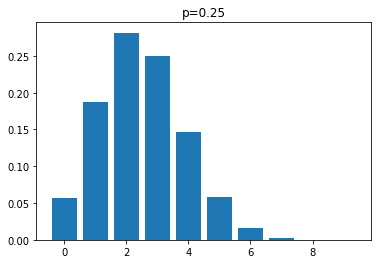

In [12]:
# Geração do gráfico
plt.bar(k_valores,distbinom)
plt.title("p=" + str(p))
plt.show()

Distribuição de Poisson

In [13]:
# Exemplo
# Admita que o número de consultas à home page de uma determinada Empresa durante um período de tempo obedece a uma distribuição de Poisson e que em média 2

In [14]:
# a) Qual a probabilidade de que em um determinado dia sejam realizadas exatamentes  três consultas?
print("P(x=3):",poisson.pmf(3,2))

P(x=3): 0.18044704431548356


In [15]:
# b) Qual a probabildaide de que em um determinado dia ocorram mais de cinco consultas?
print("P(x=3):",1-poisson.cdf(5,2))

P(x=3): 0.016563608480614445


In [16]:
# Gerar digitps aleatórios da distribuição Poisson
# Poisson
from numpy import random

x = random.poisson(lam=2, size=10)

print(x)

[1 5 4 3 3 0 4 1 1 1]


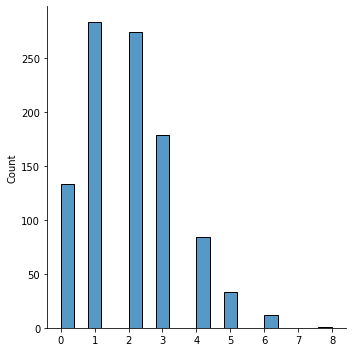

In [17]:
# Geração de valores aleatórios e apresentação gráfica
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(random.poisson(lam=2, size=1000), kde=False)
plt.show()

Distribuição Uniforme

In [18]:
# Exemplo
## Um profissional de computação observou que seu sistema gasta entre 20 e 24 segundos para realizar determinada tarefa. Sob esse intervalo, calcule a média, variância e a probabilidade do sistema gastar mais de 23 segundos.

In [19]:
# P(X>23) = 1 - P(X<=23)
1-uniform.cdf(23,20,4)


0.25

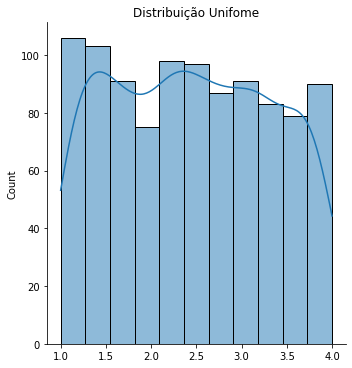

In [20]:
# Geração de valores aleatórios e apresentação gráfica
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(random.uniform(1,4, size=1000), kde=True)
plt.title('Distribuição Unifome')
plt.show()

Distribuição Exponencial

In [21]:
# no scale deve ser coloado a média da distribuição: E[t] = 1/lambda
# P(2<= T <=3) = P(T>=2) - P(T>3)
expon.cdf(3,scale=1/2)-expon.cdf(2,scale=1/2) 

0.015836886712067844

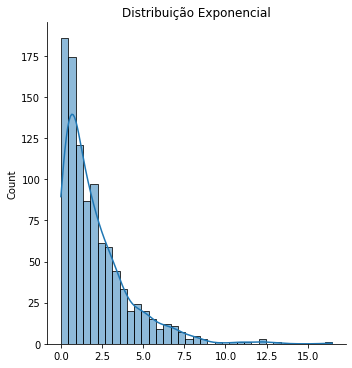

In [40]:
# Geração de valores aleatórios e apresentação gráfica
import matplotlib.pyplot as plt
import seaborn as sns
dexpo = (random.exponential(2, size=1000))
sns.displot(dexpo, kde=True)
plt.title('Distribuição Exponencial')
plt.show()

Distribuição Normal

In [23]:

# Exemplo: Suponha que o tempo de resposta na execução de um algoritmo é uma variável aleatória com distribuição normal de média 23 segundos e desvio padrão de 4 segundos. Calcule:

In [24]:
# a) A probabilidade de o tempo de resposta ser menor que 22 segundos;
# P(x < 22) = F(22)
norm.cdf(22, 23, 4)

0.4012936743170763

In [25]:
# b) A probabilidade de o tempo de resposta ficar entre 20 e 30 segundos;
# P(20 <= X <= 30)
norm.cdf(30,23,4)-norm.cdf(20,23,4)

0.7333134907593146

In [26]:
# c) A probabilidade do tempo de resposta ser maior que 21 segundos;
1-norm.cdf(21,23,4)

0.6914624612740131

In [27]:
# d) A probabilidade do tempo de respostar ficar entre 24 e 26 segundos;
norm.cdf(26,23,4)-norm.cdf(24,23,4)

0.17466632194020804

In [28]:
# e) Qual deve ser o tempo de resposta mínimo para 10% não completarem os 23 segundos?  
norm.ppf(0.10,23,4)

17.8737937378216

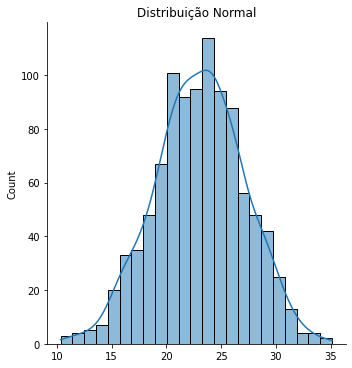

In [29]:
# Geração de valores aleatórios e apresentação gráfica
import matplotlib.pyplot as plt
import seaborn as sns
dnormal = (random.normal(23,4, size=1000))
sns.displot(dnormal, kde=True)
plt.title('Distribuição Normal')
plt.show()


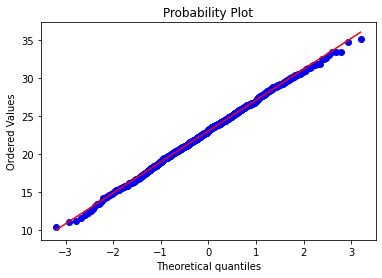

In [30]:
# Geração de gráfico para verificar se a distribuição é normal 1
fig, ax = plt.subplots()
stats.probplot(dnormal, fit=True,   plot=ax)
plt.show()

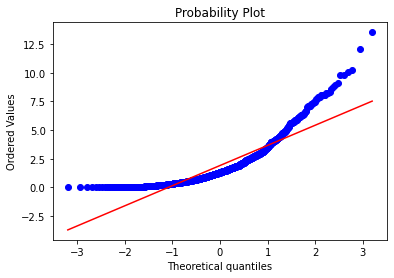

In [31]:
# Geração de gráfico para verificar se a distribuição é normal 1
fig, ax = plt.subplots()
stats.probplot(dexpo, fit=True,   plot=ax)
plt.show()

In [32]:
# Execução do teste de Shapiro Wilk
# Primeiro valor é o resultado da estatística e o segundo argumento é o valor de p.
# Ho = Os dados apresentam distribuição
# H1 = Os dados não apresentam distribuição normal
# Se o segundo termo (p-valor) é menor que 0,05 (5%) rejeita-se a hipótese nula.
# stats.shapiro(dnormal)
stats.shapiro(dexpo)

(0.816882312297821, 3.100704011046057e-32)

# Exercício Avaliativo II

Q7. Dados históricos mostram que 70% das pessoas que acessam a página p20, também acessam a página p21. Qual a probabilidade de que, nos 10 próximos acessos a página p20, a maioria também acesse acesse a página p21.

In [33]:
# distribuição binomial com cálculo da probabilidade acumulada
print("P(x>5):",1-binom.cdf(5,10,0.7))

P(x>5): 0.8497316674


Q8. Um lote de notebooks é recebido por uma firma. Vinte máquinas são inspecionadas. O lote é rejeitado se pelo menos 4 forem defeituosas. Sabendo-se que 1% dos aparelhos são defeituosos, determine a probabilidade de a firma rejeitar todo o lote.

In [34]:
# distribuição binomial com cálculo da probabilidade acumulada
print("P(x>5):",1-binom.cdf(3,20,0.01))

P(x>5): 4.262092764240055e-05


Q9. Supondo que consultas num banco de dados ocorrem de forma independentes e aleatória, com uma taxa média de 3 consultas por minuto, qual a probabilidade de que no próximo minuto ocorram menos de 3 consultas

In [35]:
# distribuição de poisson com cálculo de probabilidade acumulada
print("P(x<=2) = ",poisson.cdf(2,3))

P(x<=2) =  0.42319008112684364


Q10. A análise dos dados dos últimos anos de uma empresa de energia elétrica forneceu o valor médio de um blecaute por ano. Qual a probabilidade de ocorrer de 2 a 4 blecautes no próximo ano?

In [36]:
# distribuição de poisson com cálculo de probabilidade acumulada
print("P(2<=x<=4) = P(x<=4)-P(x<=1)", poisson.cdf(4,1) - poisson.cdf(1,1))

P(2<=x<=4) = P(x<=4)-P(x<=1) 0.26058127082977167
